
##  Простой анализ данных.

In [382]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

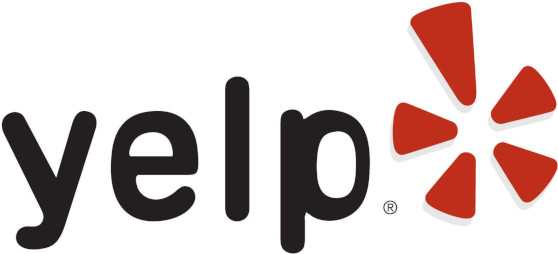

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [384]:
data = pd.read_csv(
    r"C:\Users\mrkik\OneDrive\Рабочий стол\yelp_business.csv", index_col=0
)
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [385]:
group_data = data.groupby("city")["name"].count().sort_values()[::-1]
group_data.head()

city
Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: name, dtype: int64

Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

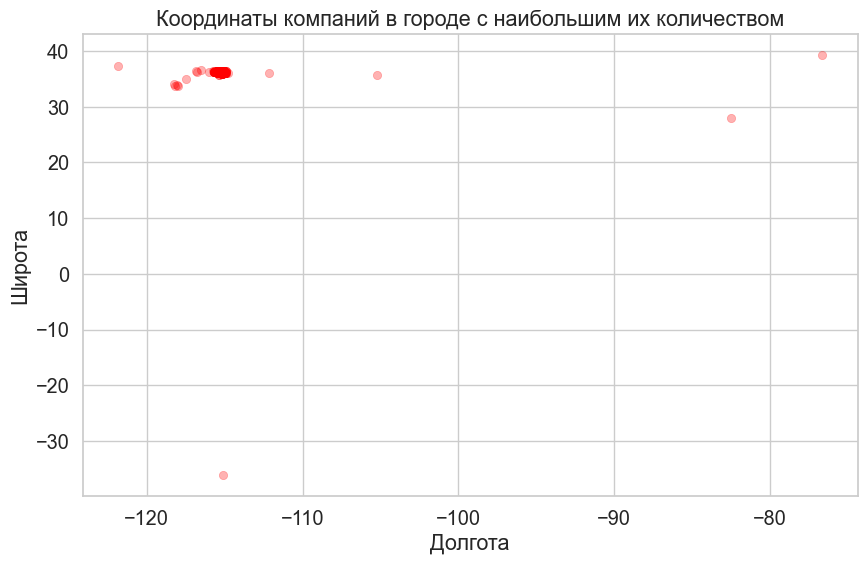

In [386]:
# отбираем только компании соответствующие городу N

N = "Las Vegas"
N_data = data[data["city"] == N]


plt.figure(figsize=(10, 6))

# График координат в городе N

ax = sns.scatterplot(
    data=N_data, x="longitude", y="latitude", alpha=0.3, edgecolor=None, color="red"
)

# Подписи и названия осей
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Координаты компаний в городе с наибольшим их количеством")
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

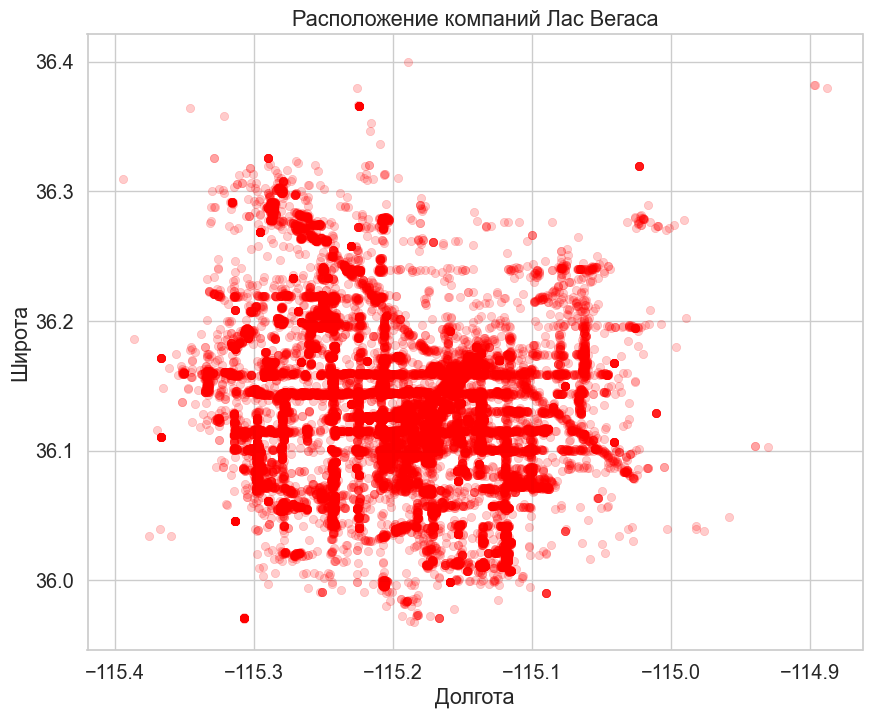

In [387]:
# на глаз отбираем только компании находящиеся на территории города N

city_data = N_data[
    (N_data["longitude"] > -115.4)
    & (N_data["longitude"] < -114.8)
    & (N_data["latitude"] > 35.96)
    & (N_data["latitude"] < 36.4)
]
plt.figure(figsize=(10, 8))

# График координат в городе N

ax = sns.scatterplot(
    data=city_data, x="longitude", y="latitude", alpha=0.2, edgecolor=None, color="red"
)

# Подписи и названия осей
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Расположение компаний Лас Вегаса")
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

**Выполнение:** используем *Folium*. Выберем на глаз начальное приближение и координаты цента карты. С помощью цикла заполним карту информацией из таблицы. Будем помечать компании точками. Сохраним полученную карту в **"map1.html"**

In [388]:
import folium

lat = city_data["latitude"]
lon = city_data["longitude"]

map = folium.Map(location=[36.15, -115.2], zoom_start=11)

for (
    lat,
    lon,
) in zip(lat, lon):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        fill_color="blue",
        color="blue",
        fill_opacity=0.2,
        opacity=0,
    ).add_to(map)

map.save("map1.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [389]:
reviews_data = pd.read_csv(
    r"C:\Users\mrkik\OneDrive\Рабочий стол\yelp_review.csv", index_col=0
)
reviews_data.head()

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [390]:
N = "Las Vegas"
N_data = data[data["city"] == N]

business_ids = N_data["business_id"].tolist()
reviews_data.set_index("business_id", inplace=True)
reviews_data = reviews_data.loc[business_ids]

Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [391]:
mean_reviews = reviews_data.groupby("business_id").aggregate(["mean", "size"])

# мне не нравится когда business_id выступает в качестве индекса, поэтому я намеренно его заменю

mean_reviews = mean_reviews.reset_index()
mean_reviews.head()

business_id     stars      
                               mean  size
0  --9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
1  --DdmeR16TRb3LsjG0ejrQ  3.200000     5
2  --WsruI0IGEoeRmkErU5Gg  4.928571    14
3  --Y7NhBKzLTbNliMUX_wfg  4.875000     8
4  --e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [392]:
mean_reviews.columns = mean_reviews.columns.droplevel(0)
mean_reviews = mean_reviews.rename(
    columns={
        "": "ID компании",
        "stars": "Оценки",
        "mean": "Средняя оценка",
        "size": "Число оценок",
    }
)
mean_reviews.head()

,ID компании,Средняя оценка,Число оценок
0,--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
1,--DdmeR16TRb3LsjG0ejrQ,3.200000,5
2,--WsruI0IGEoeRmkErU5Gg,4.928571,14
3,--Y7NhBKzLTbNliMUX_wfg,4.875000,8
4,--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [393]:
mean_reviews.set_index("ID компании", inplace=True)
city_data = city_data.rename(columns={"business_id": "ID компании"})
city_data.set_index("ID компании", inplace=True)
city_data = city_data.join(mean_reviews)

Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

**Сначала построим статический график**

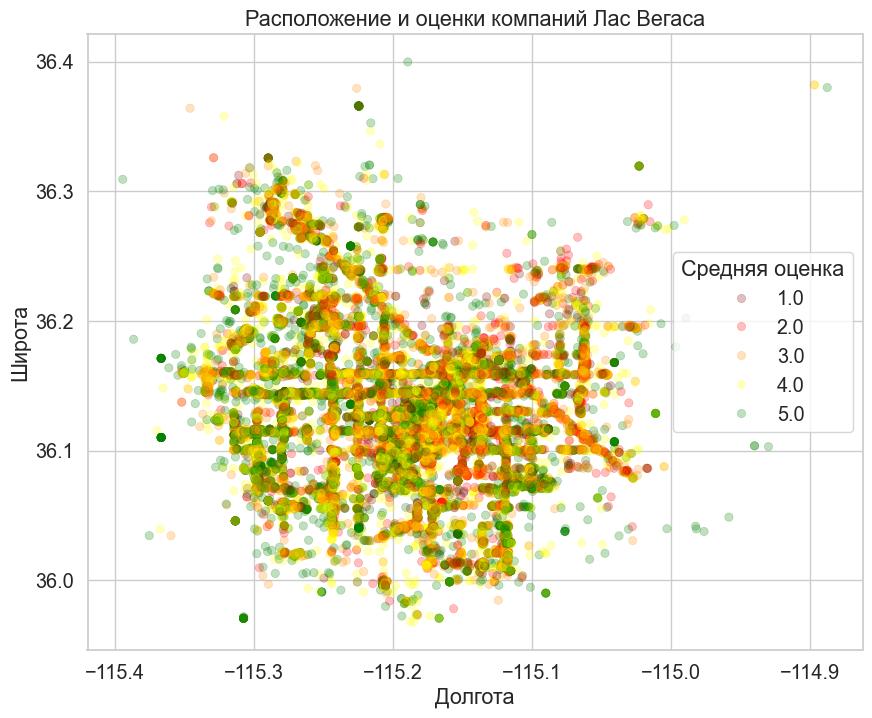

In [394]:
tmp_data = city_data.copy()
tmp_data["Средняя оценка"] = tmp_data["Средняя оценка"].round()

plt.figure(figsize=(10, 8))
colors = ["green", "yellow", "darkorange", "red", "maroon"][::-1]

ax = sns.scatterplot(
    data=tmp_data,
    x="longitude",
    y="latitude",
    hue="Средняя оценка",
    alpha=0.25,
    edgecolor=None,
    palette=colors,
)

# Подписи и названия осей
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.title("Расположение и оценки компаний Лас Вегаса")
plt.show()

**Теперь построим динамический и запишем карту в "map2.html"**

In [395]:
lat = tmp_data["latitude"]
lon = tmp_data["longitude"]
stars = tmp_data["Средняя оценка"]

map = folium.Map(location=[36.15, -115.2], zoom_start=11)

# для того чтобы цвет соответсвовал рейтингу напишем свою функцию


def color_change(star):
    if star == 5:
        return "green"
    elif star == 4:
        return "yellow"
    elif star == 3:
        return "darkorange"
    elif star == 2:
        return "red"
    else:
        return "maroon"


for lat, lon, star in zip(lat, lon, stars):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        fill_color=color_change(star),
        color="red",
        fill_opacity=0.3,
        opacity=0,
    ).add_to(map)

map.save("map2.html")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

**Используем предложенную в подсказке идею**

In [396]:
cells_data = city_data.copy()
cells_data["longitude"] = np.round(cells_data["longitude"] * 4, decimals=1) * 0.25
cells_data["latitude"] = np.round(cells_data["latitude"] * 4, decimals=1) * 0.25
cells_data.head()

,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,Средняя оценка,Число оценок
ID компании,,,,,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.200,-115.275,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.200,-115.250,1,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.075,-115.125,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.050,-115.275,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.100,-115.050,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

**Ответ:** Так как выбор способа подсчета лежет целиком на аналитике, я выбрал второй способ. Оценка районов по качеству сервиса местных компаний имеет мало смысла, если одна компания с большим количеством плохих отзывов целиком меняет картину района, даже если в нем присутвует большое число компаний с положительными, но малочисленными оценками (и наоборот). В этом случае разумнее смотреть на оценки самих заведений, или компаний в целом.

[Text(0.5, 15.049999999999999, 'Долгота'), Text(42.25, 0.5, 'Широта')]

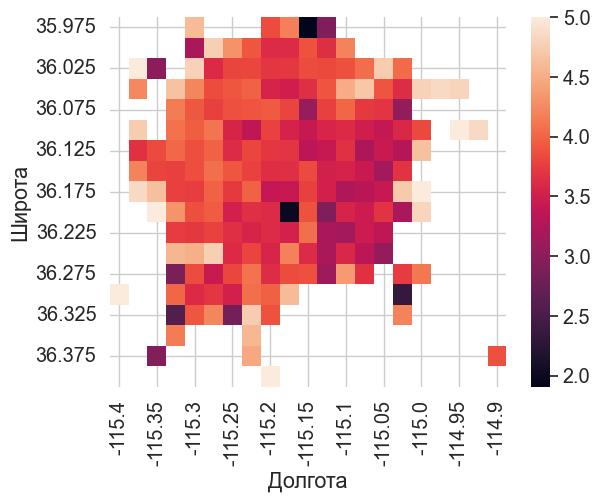

In [397]:
pivot_data = pd.pivot_table(
    cells_data,
    index="latitude",
    columns="longitude",
    values="Средняя оценка",
    aggfunc="mean",
)
hm = sns.heatmap(data=pivot_data, annot=False)
hm.set(xlabel="Долгота", ylabel="Широта")

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых, на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Такой график дает неравноценные результаты для районов с на порядок разным количеством компаний. При большом количестве компании и отзывов снижается процент выбросов и повышается точность анализа. В данном случае автоматическая цветовая палитра не играет существенной роли, при этом при большем диапазоне оценок (например от 0 да 100) такая палитра уменьшит распознавамость данных. 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

[Text(0.5, 15.049999999999999, 'Долгота'), Text(42.25, 0.5, 'Широта')]

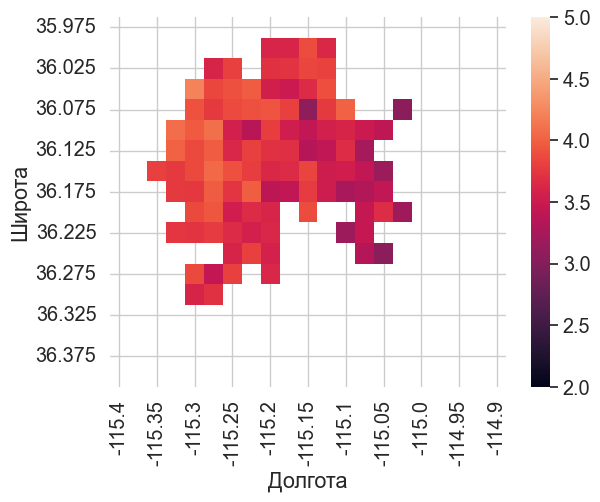

In [398]:
tmp_cells_data = cells_data.reset_index()

pivot_data2 = pd.pivot_table(
    tmp_cells_data,
    index="latitude",
    columns="longitude",
    values=["Средняя оценка", "ID компании"],
    aggfunc={"Средняя оценка": "mean", "ID компании": "count"},
)

pivot_data2 = pivot_data2[pivot_data2["ID компании"] >= 30]

hm2 = sns.heatmap(data=pivot_data2["Средняя оценка"], annot=False, vmin=2, vmax=5)
hm2.set(xlabel="Долгота", ylabel="Широта")

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** При нормировке шкалы по минимамальному и максимальному значениям появлялась проблема в распознавании данных, так как большая часть значений оценок лежит в относительно узком диапазоне. В графике выше проблема решена - теперь отличия схожих по средней оценке компаний районы более различимы.

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

<Axes: title={'center': 'Распределение и оценки ресторанов Лас Вегаса'}, xlabel='Долгота', ylabel='Широта'>

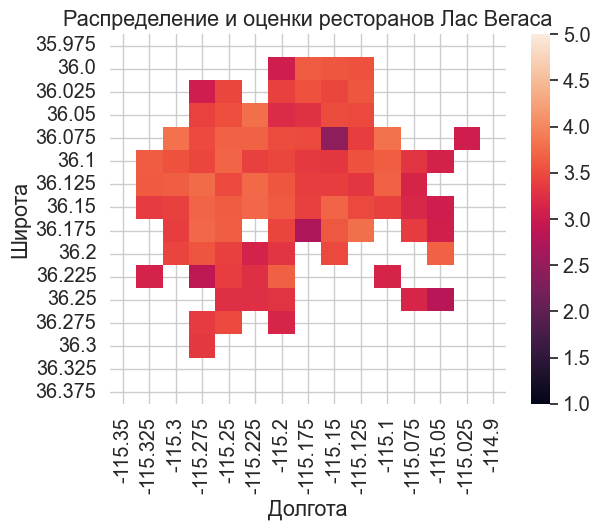

In [399]:
restaurants = tmp_cells_data[
    (tmp_cells_data["categories"].str.contains("restaurant|Restaurant"))
    & (tmp_cells_data["Число оценок"] >= 5)
]
pivot_data3 = pd.pivot_table(
    restaurants,
    index="latitude",
    columns="longitude",
    values=["Средняя оценка", "ID компании"],
    aggfunc={"Средняя оценка": "mean", "ID компании": "count"},
)

pivot_data3 = pivot_data3[pivot_data3["ID компании"] >= 10]
ax = plt.axes()
hm3 = sns.heatmap(
    data=pivot_data3["Средняя оценка"], annot=False, vmin=1, vmax=5, ax=ax
)
hm3.set(xlabel="Долгота", ylabel="Широта")
ax.set_title("Распределение и оценки ресторанов Лас Вегаса")
hm3

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** При большом количестве ресторанов в районе и отзывов на них снижается вероятность статистичесткой ошибки и повышается точность анализа. Такие данные позволяют определить районы с наибольшим количством ресторанов и произвести отбор районов по доли (а в нашем случае и по количеству) ресторанов с положительными отзывами.

Построим дополнительно карту ресторанов Лас Вегаса с оценками на них **"map4.html"**.

In [400]:
tmp_data = city_data.copy()
tmp_data = tmp_data[
    (tmp_data["categories"].str.contains("restaurant|Restaurant"))
    & (tmp_data["Число оценок"] >= 5)
]
tmp_data["Средняя оценка"] = tmp_data["Средняя оценка"].round()
lat = tmp_data["latitude"]
lon = tmp_data["longitude"]
stars = tmp_data["Средняя оценка"]


map = folium.Map(location=[36.15, -115.2], zoom_start=11)


def color_change(star):
    if star == 5:
        return "green"
    elif star == 4:
        return "yellow"
    elif star == 3:
        return "darkorange"
    elif star == 2:
        return "red"
    else:
        return "maroon"


for lat, lon, star in zip(lat, lon, stars):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        fill_color=color_change(star),
        color="red",
        fill_opacity=0.3,
        opacity=0,
    ).add_to(map)

map.save("map4.html")

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [401]:
restaurants = restaurants[restaurants["Число оценок"] >= 50].sort_values(
    "Средняя оценка"
)[::-1]
output_rest = restaurants.drop(
    [
        "ID компании",
        "neighborhood",
        "city",
        "address",
        "postal_code",
        "is_open",
        "state",
    ],
    axis=1,
)
output_rest = output_rest.rename(
    columns={
        "name": "Название ресторана",
        "longitude": "Долгота",
        "latitude": "Широта",
        "categories": "Категории",
    }
)
output_rest.head(10)

,Название ресторана,Широта,Долгота,Категории,Средняя оценка,Число оценок
3602,"""Lip Smacking Foodie Tours""",36.125,-115.175,Food Tours;Restaurants;Event Planning & Servic...,4.966480,179
25392,"""Pepito Shack""",36.150,-115.150,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,4.907692,65
16605,"""Bosa Boba Cafe""",36.125,-115.175,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,4.890909,55
25715,"""Garden Grill""",36.175,-115.275,Tacos;Street Vendors;Farmers Market;Vegetarian...,4.868132,91
2128,"""Brew Tea Bar""",36.050,-115.250,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,4.848069,1165
18943,"""Poppa Naps BBQ""",36.125,-115.100,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,4.836538,104
12010,"""Zenaida's Cafe""",36.100,-115.100,Restaurants;Breakfast & Brunch;Cafes,4.833333,180
11914,"""El Frescos Cocina Mexicana""",36.100,-115.150,Caterers;Mexican;Restaurants;Food;Event Planni...,4.816754,191
5342,"""Blaqcat Ultra Hookah Lounge""",36.150,-115.225,Adult Entertainment;Lounges;Hookah Bars;Restau...,4.809524,63
25282,"""Smooth Eats""",36.175,-115.150,Juice Bars & Smoothies;Restaurants;Sandwiches;...,4.807018,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

Нанесем данные на карту **"map3.html"**, помеченные рестораны выделим красным

In [402]:
tmp_data = city_data.copy()
tmp_data = tmp_data[
    (tmp_data["categories"].str.contains("restaurant|Restaurant"))
    & (tmp_data["Число оценок"] >= 50)
]

tmp_data = tmp_data[tmp_data["Средняя оценка"] >= 4.7]

lat = tmp_data["latitude"]
lon = tmp_data["longitude"]
names = tmp_data["name"]


map = folium.Map(location=[36.15, -115.2], zoom_start=11)


def color_change(name):
    if name in output_rest.head(10)["Название ресторана"].tolist():
        return "red"
    return "blue"


for lat, lon, name in zip(lat, lon, names):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        fill_color=color_change(name),
        color="red",
        fill_opacity=0.9,
        opacity=0,
    ).add_to(map)

map.save("map3.html")

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий руководствуется изложенными выше фактами о том, что большой объем данных позволяет существенно снизить процент выбросов и шанс статистической ошибки. 

В первой части работы были выбраны данные для исследования. Дальнейшая их обработка показала, что ручной отбор выбросов в данной работе допустим из-за особенностей анализа (тепловые карты, деление на районы), а так же большого объема данных. 

Во второй и третьей частях исследованы различные способы построения тепловых карт и сводных таблиц. Выявлены преимущества больших объемов данных, грамотных оценок на эти данные при анализе, а так же предъявлены случаи когда собсвенная шкала значений на тепловых картах более показательна. 